In [1]:
# IMPORT ALL THE REQUIRED LIBRARY import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Now import our mushrooms dataset
data=pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Data is having 8124 rows and 23 columns.

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

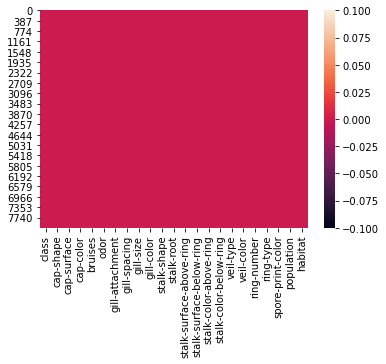

In [6]:
sns.heatmap(data.isnull())

All the columns filled with the data, no column have null value. so we can proceed futher analysis.

<AxesSubplot:xlabel='class', ylabel='count'>

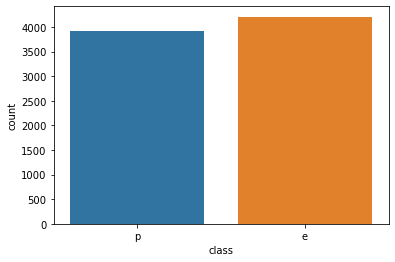

In [7]:
sns.countplot(x='class', data=data)

In [8]:
data.value_counts(['class'])

class
e        4208
p        3916
dtype: int64

data is almost Balanced. So no need to balance the data.

we can seen that our data is object type and we have to need encode the data before going for futher steps of analysis.

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  

In [10]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
columns_list= data.columns.values  
for i in columns_list:
    data[i]=le.fit_transform(data[i])

In [12]:
columns_list.shape

(23,)

In [13]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [14]:
data.shape

(8124, 23)

In [15]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


We have use heatmap to visualize the correlation

<AxesSubplot:>

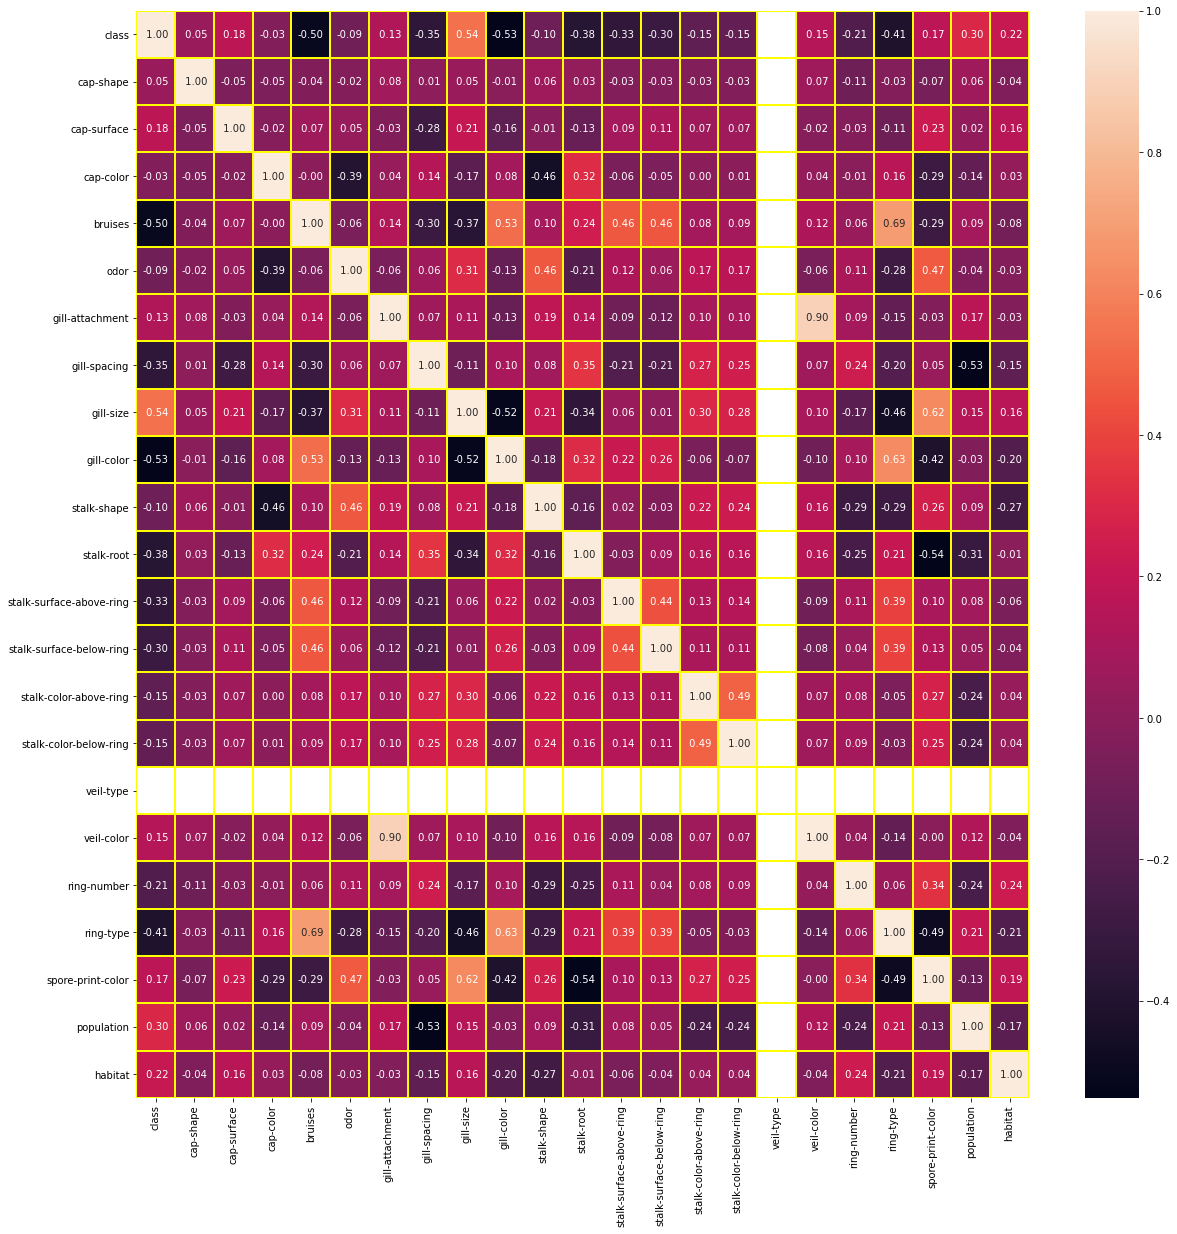

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=1,linecolor='yellow',fmt=' .2f')

Here we can see veil-type columns have no effect on our target column, so we can drop that column.

In [17]:
data=data.drop(['veil-type'],axis=1)

In [18]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


 Now split data in dependent and independent variables

In [19]:

x=data.iloc[:,1:]
y=data.iloc[:,-22]

In [20]:
x.shape

(8124, 21)

In [21]:
y.shape

(8124,)

now we have Import all required training models so we can check the best fit model.

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

lg=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Here we have imported all required training models, we check the best fit model.

In [23]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train= lg.predict(x_train)
    pred_test= lg.predict(x_test)
    if round (accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",accuracy_score(y_train,pred_train)*100)
        print("testing r2 score ",accuracy_score(y_test,pred_test)*100)

At Random state 18 The model perform very well
At random State: 18
Training r2_score 95.30697030312356
testing r2 score  95.26153846153846
At Random state 28 The model perform very well
At random State: 28
Training r2_score 94.99923065086936
testing r2 score  95.01538461538462
At Random state 36 The model perform very well
At random State: 36
Training r2_score 94.8915217725804
testing r2 score  94.89230769230768
At Random state 53 The model perform very well
At random State: 53
Training r2_score 95.10693952915832
testing r2 score  95.07692307692308
At Random state 54 The model perform very well
At random State: 54
Training r2_score 95.19926142483459
testing r2 score  95.19999999999999
At Random state 117 The model perform very well
At random State: 117
Training r2_score 95.0607785813202
testing r2 score  95.13846153846154
At Random state 132 The model perform very well
At random State: 132
Training r2_score 95.24542237267272
testing r2 score  95.19999999999999
At Random state 156 The m

At random state 210, we are get better r2 score.
At random State: 210
Training r2_score 95.56854900753962
testing r2 score  95.56923076923077

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=210,test_size=0.20)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53       844
           1       0.48      0.46      0.47       781

    accuracy                           0.50      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       0.50      0.50      0.50      1625



In [26]:
pred_lg = lg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lg)
for j in range(2,10):
    lsscore= cross_val_score(lg,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lsc*100)
    print("Accuracy Score:-", lss*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 81.31462333825702
Accuracy Score:- 95.07692307692308


at cv:- 3
Cross Validation scre is:- 81.1915312653865
Accuracy Score:- 95.07692307692308


at cv:- 4
Cross Validation scre is:- 82.9394387001477
Accuracy Score:- 95.07692307692308


at cv:- 5
Cross Validation scre is:- 84.03339901477833
Accuracy Score:- 95.07692307692308


at cv:- 6
Cross Validation scre is:- 87.82619399310684
Accuracy Score:- 95.07692307692308


at cv:- 7
Cross Validation scre is:- 88.34389837196574
Accuracy Score:- 95.07692307692308


at cv:- 8
Cross Validation scre is:- 86.75462307513286
Accuracy Score:- 95.07692307692308


at cv:- 9
Cross Validation scre is:- 87.38175859559864
Accuracy Score:- 95.07692307692308




at cv:- 3

Cross Validation scre is:- 81.12998522895126

Accuracy Score:- 95.19999999999999

In [27]:
lssscore_selected=cross_val_score(lg,x,y,cv=3).mean()
print("The cv score is: ", lssscore_selected,"\nThe accuracy score is: ", lss)

The cv score is:  0.8119153126538651 
The accuracy score is:  0.9507692307692308


In [28]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

In [29]:
Model= [LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]
for i in Model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy score of', i, 'is:')
    print (accuracy_score(y_test,predi))
    print (confusion_matrix(y_test,predi))
    print (classification_report(y_test,predi))
    print('\n')

Accuracy score of LogisticRegression() is:
0.9556923076923077
[[804  40]
 [ 32 749]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       844
           1       0.95      0.96      0.95       781

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Accuracy score of RandomForestClassifier() is:
1.0
[[844   0]
 [  0 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Accuracy score of GaussianNB() is:
0.9243076923076923
[[774  70]
 [ 53 728]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       8

RandomForestClassifier()=1.0

KNeighborsClassifier()=1.0

DecisionTreeClassifier() =1.0

Here all the three performing well so we can save any one model.

In [30]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred ))
print(confusion_matrix(y_test,dtpred ))
print(classification_report(y_test,dtpred ))

1.0
[[844   0]
 [  0 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



AOC ROC curve

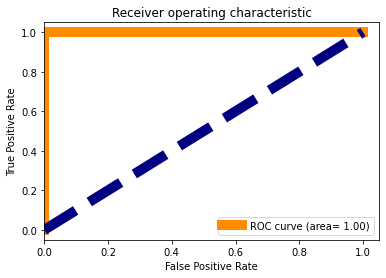

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(dtpred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Now  we Save best Model

we have select Decision Tree Model

In [32]:
import pickle
filename='Mushroom_Pred.pkl'
pickle.dump(dt,open(filename,'wb'))

In [33]:
import numpy as np
a=np.array(y_test)
predicted= np.array(dt.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,0,0
1623,0,0


At the end we have presented both Original and Pridicted data